In [1]:
import pandas as pd
import numpy as np
from funkcje.main_05_wczytanie_csv import wczytaj_main
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Users

In [2]:
users = wczytaj_main(
    input_path="/media/ola/Elements SE/dane_gotowe/",
    typ_pliku="Users",
    kolumny=["AccountId", "DisplayName", "Id"],
    part_len=15
)

Zaczynamy!


100%|██████████| 8/8 [00:01<00:00,  4.94it/s]


Gotowe! Zajęło nam to: 102.8s


# Posty

In [3]:
posts = wczytaj_main(
    input_path="/media/ola/Elements SE/dane_gotowe/",
    typ_pliku="Posts",
    kolumny=["Id", "OwnerUserId"],
    part_len=15
)

Zaczynamy!


100%|██████████| 8/8 [00:01<00:00,  4.54it/s]


Gotowe! Zajęło nam to: 231.0s


In [4]:
Mareczek = users.query("DisplayName=='gagolews'")


In [4]:
Fora = users.groupby('AccountId').size().rename('ilosc_forów').reset_index().sort_values("ilosc_forów", ascending = False).head(30).reset_index()
Fora

,index,AccountId,ilosc_forów
0,0,-1.0,338
1,49366,73323.0,337
2,26044,37099.0,337
3,1424160,5129611.0,336
4,132221,270038.0,336
5,1953362,7238091.0,336
6,1665161,6085540.0,336
7,1677033,6132527.0,336
8,2276963,8662386.0,336
9,1002947,3457374.0,336


In [5]:
kto_jakie_posty = pd.merge( left=users,right=posts, left_on=["Forum", "Id"], right_on = ["Forum", "OwnerUserId"])

In [6]:
Liczba_postow_kazdej_osoby = kto_jakie_posty.groupby(['AccountId']).size().rename('tyle_postow').reset_index().iloc[1:]

In [7]:
data1 = users.loc[users.AccountId.isin(Liczba_postow_kazdej_osoby.AccountId)].groupby('AccountId').size().rename('ilosc_forow').reset_index()

In [8]:
data2 = data1.loc[1:]

In [9]:
users.AccountId = users.AccountId.astype(float)

In [10]:
Zaleznosc = pd.merge(data2, Liczba_postow_kazdej_osoby, on = 'AccountId').sort_values('ilosc_forow')

In [11]:
%matplotlib inline

Text(0,0.5,'ilosc_postow')

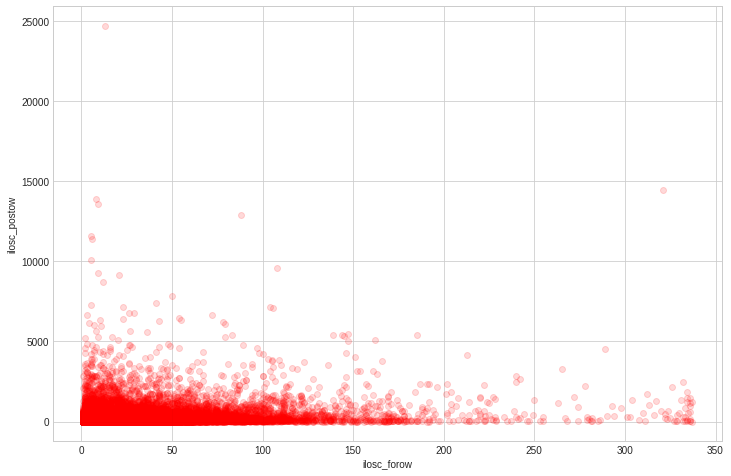

In [12]:
#%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (12, 8)
plt.style.use('seaborn-whitegrid')
plt.plot(Zaleznosc.ilosc_forow, Zaleznosc.tyle_postow, 'ro', alpha = 0.15)
plt.xlabel('ilosc_forow')
plt.ylabel('ilosc_postow')

In [13]:
Zaleznosc2 = pd.merge(data2, Liczba_postow_kazdej_osoby, on = 'AccountId').sort_values('tyle_postow', ascending = False).head(500)

In [14]:
Zaleznosc2 #wszyscy którzy maja wiecej postow niz 10 000

,AccountId,ilosc_forow,tyle_postow
147599,513966.0,13,24683
63502,164368.0,321,14482
146292,512076.0,8,13908
145440,510889.0,9,13608
131728,470318.0,88,12926
668060,3487601.0,5,11571
145719,511285.0,6,11392
394239,1919584.0,5,10082
372404,1801709.0,108,9585
178868,845543.0,9,9246


In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np


trace = go.Scattergl(
    x = Zaleznosc2.ilosc_forow,
    y = Zaleznosc2.tyle_postow,
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
data = [trace]
py.iplot(data, filename='compare_webgl')


In [16]:
ilosc_postow_w_forum = kto_jakie_posty.loc[kto_jakie_posty.AccountId.isin(Zaleznosc2.AccountId)].groupby(['AccountId','Forum']).size().rename('Count').reset_index()

In [17]:
ludek1AccountId = Zaleznosc2.query("tyle_postow == 24683").AccountId.iloc[0]
ludek1 = ilosc_postow_w_forum.loc[ilosc_postow_w_forum.AccountId==ludek1AccountId,['Forum','Count']]

8


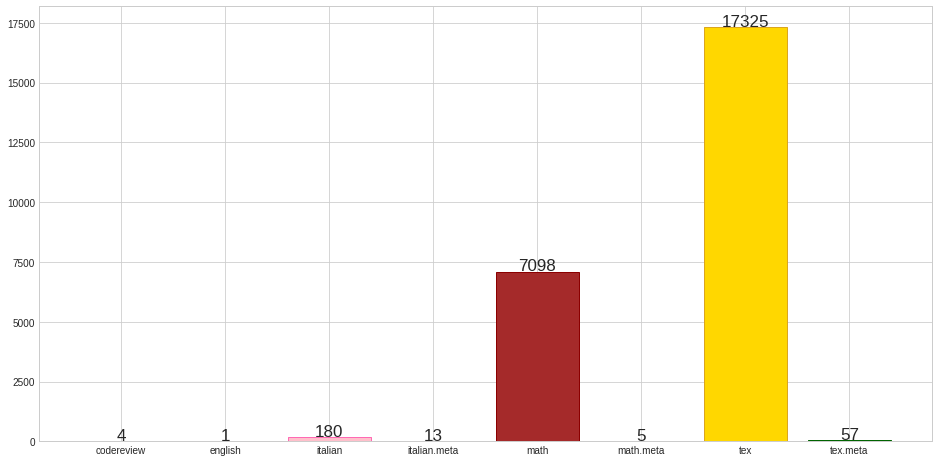

In [18]:
plt.rcParams["figure.figsize"] = (16, 8)
n = len(ludek1.Forum)
print(n)
plt.bar(ludek1.Forum, ludek1.Count, color = ['red','blue', 'pink', 'yellow','brown','silver','gold','green'],
       edgecolor=['indianred','navy', 'hotpink', 'orange','darkred','gray','goldenrod','darkgreen']
       )

for i in range(len(ludek1.Forum)):
    plt.text(x=i, y=ludek1.Count.iloc[i]+40, s=ludek1.Count.iloc[i], size = 17,horizontalalignment='center') 
plt.show()

## Coś o ukrainie, polityka a dostępność ludzi na forum? - nic nie znalazłam takiego, ale znalazłam coś innego :)

In [19]:
ukrainian_Users = pd.read_csv("/media/ola/Elements SE/dane_gotowe/ukrainian_Users.csv")
ukrainian_Posts = pd.read_csv("/media/ola/Elements SE/dane_gotowe/ukrainian_Posts.csv")

In [20]:
Aktywnosc = ukrainian_Posts.loc[:,["Id","PostTypeId","OwnerUserId"]].assign(Year=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.year).\
assign(Month=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.month).assign(Day=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.day).\
                groupby(["Year", "Month","Day"]).size().rename("Count").reset_index()
Pytania_i_odpowiedzi = ukrainian_Posts.loc[:,["Id","PostTypeId","OwnerUserId"]].assign(Year=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.year).\
assign(Month=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.month).assign(Day=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.day).\
                groupby(["Year", "Month","Day","PostTypeId"]).size().rename("Count").reset_index()

In [21]:
Pytania_i_odpowiedzi['Data'] = pd.to_datetime(Pytania_i_odpowiedzi[['Year','Month','Day']])
Aktywnosc['Data'] = pd.to_datetime(Aktywnosc[['Year','Month','Day']])


In [22]:
data4 = ukrainian_Posts.assign(Year=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.year).\
assign(Month=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.month).assign(Day=pd.to_datetime(ukrainian_Posts['CreationDate']).dt.day).\
loc[:,["Id","PostTypeId","ViewCount","Body","OwnerUserId","Title",'AnswerCount','CommentCount','Year','Month','Day']]
data4['Data'] = pd.to_datetime(data4[['Year','Month','Day']])
data5 = data4.loc[:,["Id","PostTypeId","ViewCount","Body","OwnerUserId","Title",'AnswerCount','CommentCount','Data']]

In [50]:
data5.groupby('OwnerUserId').size().rename('Count').reset_index().sort_values('Count', ascending = False).head(4)

,OwnerUserId,Count
1,4.0,337
277,1505.0,280
258,1467.0,244
3,8.0,244


In [120]:
data6=data5.query("OwnerUserId== 8.0").groupby("Data").size().rename("Count").reset_index()

In [55]:
data7 = data5.query("OwnerUserId == 4.0").groupby('Data').size().rename("Count").reset_index().sort_values('Data')

In [59]:
data8 = data5.query("OwnerUserId == 1505.0").groupby('Data').size().rename("Count").reset_index().sort_values('Data')

In [53]:
data9 = data5.query("OwnerUserId == 1467.0").groupby('Data').size().rename("Count").reset_index().sort_values('Data')

## Zależność zależnosći 4 osób najbardziej aktywnych

In [121]:
data1 = [
    go.Scatter(
    x = data7.Data, 
    y = data7.Count, 
    name = 'OwnerUserId = 4'),
    go.Scatter(
    x = data6.Data,
    y = data6.Count,
    name = 'OwnerUserId = 8'
    ),
    go.Scatter(
    x = data8.Data, 
    y = data8.Count, 
    name = 'OwnerUserId = 1505'),
    go.Scatter(
    x = data9.Data,
    y = data9.Count,
    name = 'OwnerUserId = 1467'
    )
]
py.iplot(data1, filename='pandas-line-naming-traces')

# Zbiorcza aktywność ludzi na ukraińskim forum

In [25]:
trace = go.Scatter(x=list(Aktywnosc.Data),
                   y=list(Aktywnosc.Count))

data = [trace]
layout = dict(
    title='Activity in Ukrainian blog',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

## Wniosek? 4 osóby robią prawie całą aktywność

# Kurs bit coina a aktywnośc na kryptowalutach

## Załadowanie danych o kursie bitcoina

In [61]:
bit_kurs =pd.read_csv("/media/ola/Elements SE/dane_dodatkowe/market-price.csv")
#ukrainian_Badges = pd.read_csv("/media/ola/Elements SE/dane_gotowe/ukrainian_Badges.csv")

In [78]:
bit_kurs = bit_kurs.rename(columns={"2009-01-03 00:00:00":"Data","0.0":"Kurs"})
dane_bitcoin = bit_kurs.assign(Year=pd.to_datetime(bit_kurs['Data']).dt.year).query("Year >= 2011")

# Załadowanie danych o bitcoinie ze stackexchange

In [76]:
bitcoin_Posts = pd.read_csv("/media/ola/Elements SE/dane_gotowe/bitcoin_Posts.csv")

In [148]:
stackbitcoin = bitcoin_Posts.assign(Year=pd.to_datetime(bitcoin_Posts['CreationDate']).dt.year, Month=pd.to_datetime(bitcoin_Posts['CreationDate']).\
                     dt.month,Day=pd.to_datetime(bitcoin_Posts['CreationDate']).dt.day).query("OwnerUserId != -1").groupby(['Year','Month','Day']).size().rename('Count').reset_index()

In [149]:
stackbitcoin['Data'] = pd.to_datetime(stackbitcoin[['Year','Month','Day']])

In [150]:

trace1 =go.Scatter(
        x = stackbitcoin.Data, 
        y = stackbitcoin.Count, 
        name = 'Aktywnosc', 
        line = dict(color='rgb(148, 103, 189)',
                   width = 1)
)

trace2 = go.Scatter(
        x = dane_bitcoin.Data,
        y = dane_bitcoin.Kurs,
        name = 'Kurs',
        yaxis='y2',
        line = dict(width = 3)
        )

data2 = [trace1,trace2]
layout = go.Layout(
    title='Course Bitcoin vs Activity',
    yaxis=dict(
        title='Activity',
        titlefont = dict(color='orangered')
    ),
    yaxis2=dict(
        title='Course',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='kurs-vs-activity')

# Aktywność na Gardening a sezony - jakaś zależność?

In [137]:
gar_pos = pd.read_csv("/media/ola/Elements SE/dane_gotowe/gardening_Posts.csv")

In [145]:
active = gar_pos.assign(Year=pd.to_datetime(gar_pos['CreationDate']).dt.year, Month=pd.to_datetime(gar_pos['CreationDate']).\
                     dt.month,Day=pd.to_datetime(gar_pos['CreationDate']).dt.day).query("OwnerUserId != -1").groupby(['Year','Month','Day']).size().rename('Count').reset_index()

In [146]:
active['Data'] = pd.to_datetime(active[['Year','Month','Day']])

In [170]:
trace1 =go.Scatter(
        x = active.Data, 
        y = active.Count, 
        name = 'Aktywnosc', 
        line = dict(color='rgb(148, 103, 189)',
                   width = 1)
)
layout = {
    # to highlight the timestamp we use shapes and create a rectangular
    'shapes': [
        # 1st highlight during Feb 4 - Feb 6
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2011-05-01','y0': 0,'x1': '2011-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2012-05-01','y0': 0,'x1': '2012-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2013-05-01','y0': 0,'x1': '2013-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2014-05-01','y0': 0,'x1': '2014-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2015-05-01','y0': 0,'x1': '2015-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2016-05-01','y0': 0,'x1': '2016-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2017-05-01','y0': 0,'x1': '2017-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}},   
        {
            'type': 'rect','xref': 'x','yref': 'paper','x0': '2018-05-01','y0': 0,'x1': '2018-10-01','y1': 1,'fillcolor': '#d3d3d3','opacity': 0.2,'line': {'width': 0,}}
    ]
}
data3 = [trace1]

py.iplot({'data':data3, 'layout':layout}, filename='Gardening-Activity')

Zaznaczyłam sezony rolnicze  no i fajnie widać zależność, że przed sezonem ludzie piszą i początek sezonu - poem mają dużo pracy, więc nie mają czasu, a w zime jest mała dość aktywność, to się zgadza z rzeczywistością :)

# Plotly

In [26]:
import plotly 
plotly.tools.set_credentials_file(username='aleksandramiesiac', api_key='klaMDSOdIcIVScwKfzXU')

# Badges

In [66]:
Badges = wczytaj_main(
    input_path="/media/ola/Elements SE/dane_gotowe/",
    typ_pliku="Badges",
    kolumny=["UserId", "Class"],
    part_len=15
)

Zaczynamy!


100%|██████████| 9/9 [00:01<00:00,  5.75it/s]


Gotowe! Zajęło nam to: 182.8s


# Zliczenie postów na użytkownika na forum

In [ ]:
(
    pd.merge(
        left=users,
        right=posts,
        left_on=["Forum", "Id"],
        right_on["Forum", "OwnerUserId"]
    )
    .groupby(["AccountId", "Forum"])
    .size.rename("Liczba_postow")
    .reset_index(drop=True)
)